# MNIST Digit Recognition

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

![Mnist examples](./assets/mnist%20examples.png)

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.datasets import mnist
import os

In [11]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(-1,784).astype("float32")/255.0
x_test = x_test.reshape(-1,784).astype("float32")/255.0

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [12]:
model = keras.Sequential(
    [
        keras.Input(784),
        layers.Dense(512,activation = "relu"),
        layers.Dense(256,activation = 'relu'),
        layers.Dense(10),
    ]
)
print(model.summary())
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(lr = 0.001),
    metrics = ['accuracy'],
)

history = model.fit(x_train,y_train,batch_size=64,epochs=10,callbacks=[cp_callback],validation_data = (x_test,y_test))
model.evaluate(x_test,y_test,batch_size=16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


/home/labeeb/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-09-13 01:32:52.573583: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-09-13 01:32:52.728208: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
928/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9420
Epoch 1: saving model to training_1/cp.ckpt
938/938 [==============================] - 3s 3ms/step - loss: 0.1945 - accuracy: 0.9423 - val_loss: 0.0894 - val_accuracy: 0.9716
Epoch 2/10
925/938 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9755
Epoch 2: saving model to training_1/cp.ckpt
938/938 [==============================] - 2s 3ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 3/10
934/938 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9833
Epoch 3: saving model to training_1/cp.ckpt
938/938 [==============================] - 2s 3ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 4/10
933/938 [============================>.] - ETA: 0s - loss: 0.0378 - accuracy: 0.9880
Epoch 4: saving model to training_1/cp.ckpt
938/938 [==============================] - 2s 3

[0.09329495579004288, 0.9781000018119812]

In [13]:
os.listdir(checkpoint_dir)

['cp.ckpt.index', 'cp.ckpt.data-00000-of-00001', 'checkpoint']

In [14]:
def plothist(hist):
    plt.figure(1)



    plt.subplot(211)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')

    plt.tight_layout()

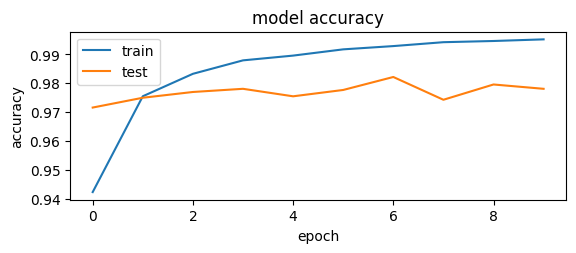

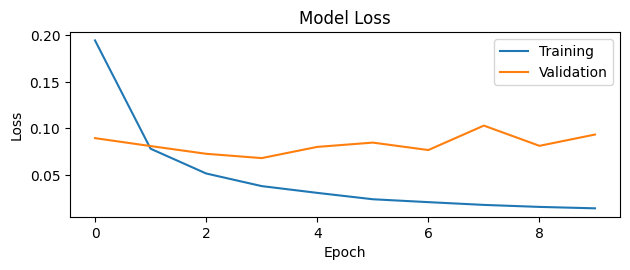

In [15]:
plothist(history)